# NEPAL EARTHQUAKE TWITTER ANALYSIS


### Microblogging sites like Twitter are increasingly being used for aiding relief operations during various mass emergencies. A lot of critical situational information is posted on microblogging sites during disaster events. However, messages posted on microblogging sites often contain rumors and overstated facts. In such situations, identification of factual or fact-checkable tweets, i.e., tweets that report some relevant and verifiable fact (other than sympathy or prayer) is extremely important for effective coordination of post-disaster relief operations. Additionally, cross verification of such critical information is a practical necessity and resource availability. Hence, automated Machine Learning techniques are needed to identify the tweets that talk about the need of resources or availability of resources.

#### IMPORTING THE LIBRARIES

In [4]:
import pandas as pd 
import numpy as np              
import seaborn as sns           
import matplotlib.pyplot as plt  

In [5]:
df=pd.read_csv("train.csv")

In [6]:
df.head(10)

,TweetClass,TweetID,TweetText
0,0,591764470197723137,#Nepal #news Adding to Bhutanese Refugees Bhut...
1,0,591779538046218240,The massacre of people's movement says peace a...
2,0,591728244925210624,I'm lonely maybe you're going to die without c...
3,0,591774433926193152,#nepal #news 6 billion collection collection 1...
4,0,591764472651386882,#Nepal #news Indian proposal to crash airport ...
5,0,591751543025569793,God also ran away for money after the poor lis...
6,0,591727216267890688,Someone feels like a tile to see
7,0,591739000001470464,The boys began to write English passage. I - taw
8,0,591753691084038146,I will not go away it's not going to be broken...
9,0,591747428358881282,Gaurab Sir


In [7]:
df.tail(10)

,TweetClass,TweetID,TweetText
18223,2,592684009563549696,Earthquake Nepal Indian Army takes up major re...
18224,2,592683279188361217,National disaster helpline number made operati...
18225,2,592694344655699968,Israel sends humanitarian aid to Nepal In the ...
18226,2,592697492422144000,#UttarPradesh \\u200bgovt sends buses to #Nepa...
18227,2,592696857815572481,Sikh organization to send lakh food packets to...
18228,2,592697535271174145,#Earthquake in #Nepal #GoldenTemple Temple to ...
18229,2,592697135390416899,Nepal Earthquake Eerts from AIIMS Safdarjung H...
18230,2,592698989507715075,UNHCR rushes plastic sheeting and solar-powere...
18231,1,5644654646545646,Urgent medical need food water needed medicine...
18232,2,543533654345435,Available plenty medicine food water


In [8]:
df.shape

(18233, 3)

In [9]:
df.describe()

,TweetClass,TweetID
count,18233.000000,1.823300e+04
mean,0.083749,5.923055e+17
std,0.386754,6.178048e+15
min,0.000000,5.435337e+14
25%,0.000000,5.921631e+17
50%,0.000000,5.925189e+17
75%,0.000000,5.926002e+17
max,2.000000,5.927001e+17


In [10]:
df.columns

Index(['TweetClass', 'TweetID', 'TweetText'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18233 entries, 0 to 18232
Data columns (total 3 columns):
TweetClass    18233 non-null int64
TweetID       18233 non-null int64
TweetText     18224 non-null object
dtypes: int64(2), object(1)
memory usage: 427.4+ KB


In [12]:
df['TweetClass'].value_counts()

0    17370
2      664
1      199
Name: TweetClass, dtype: int64

In [13]:
#Checking for null values
df.isnull()

,TweetClass,TweetID,TweetText
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [14]:
df.isnull().sum()

TweetClass    0
TweetID       0
TweetText     9
dtype: int64

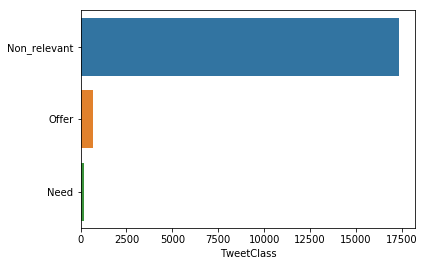

In [15]:
sns.barplot( x = df['TweetClass'].value_counts() , y = ["Non_relevant", 'Offer','Need'])

In [16]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
18203    False
18204    False
18205    False
18206    False
18207    False
18208    False
18209    False
18210    False
18211    False
18212    False
18213    False
18214    False
18215    False
18216    False
18217    False
18218    False
18219    False
18220    False
18221    False
18222    False
18223    False
18224    False
18225    False
18226    False
18227    False
18228    False
18229    False
18230    False
18231    False
18232    False
Length: 18233, dtype: bool

In [17]:
dupli=df.duplicated()
dupli.value_counts()

False    18233
dtype: int64

In [18]:
new_df=df.drop_duplicates()
new_df.describe()

,TweetClass,TweetID
count,18233.000000,1.823300e+04
mean,0.083749,5.923055e+17
std,0.386754,6.178048e+15
min,0.000000,5.435337e+14
25%,0.000000,5.921631e+17
50%,0.000000,5.925189e+17
75%,0.000000,5.926002e+17
max,2.000000,5.927001e+17


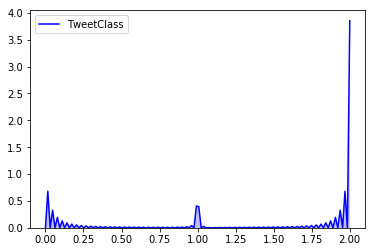

In [19]:
sns.kdeplot(data = df.TweetClass , color = 'blue' , shade = True)

In [20]:
irrelevant_df=df[df['TweetClass']==0]
need_df=df[df['TweetClass']==1]
available_df=df[df['TweetClass']==2]
print(irrelevant_df.shape)
print(need_df.shape)
print(available_df.shape)

(17370, 3)
(199, 3)
(664, 3)


In [21]:
need_df.head(10)

,TweetClass,TweetID,TweetText
17370,1,591922042481479680,Nepal seeks mobile medical assistance from India
17371,1,591979790627840000,Nepalis r w/o water &amp electricity Water is ...
17372,1,591985311665684480,The wounded and untimely families need to take...
17373,1,591989264256106499,they are in search of blood donors for the peo...
17374,1,591987020924260354,Walked all around central &amp old KTM.Shops o...
17375,1,591988336090173440,Food First Aid &amp Tents would be the princip...
17376,1,591985786880327682,RightWingers of ALL religions must keep away f...
17377,1,591992896485597184,Lac Rail Neer bottles is not what Nepal needs ...
17378,1,591995052169105408,Need more resources and personnel from Army fo...
17379,1,591996373869826048,India could surely despatch -4 Field Ambulance...


In [22]:
available_df.head(10)

,TweetClass,TweetID,TweetText
17568,2,591915875638325248,Indian Prime Minister Narendra Modi has announ...
17569,2,591933551798419456,Phone from NTC does not take money when you ca...
17570,2,591939270673182721,India has sent 5 helicopters for relief and re...
17571,2,591968116919410690,NDRF personnel relief material was sent to Nep...
17572,2,591974898139987968,#SriLanka to fly emergency medical help food t...
17573,2,591978159102435328,· Hospital Fire Brigade and Blood Banks Name T...
17574,2,591978910713139202,Just electricity is available at Shankhamul ar...
17575,2,591975873009582080,Indian Railways Ministry sending one lakh Rail...
17576,2,591976580232052736,Amount of supplies may be used for more than d...
17577,2,591975888494854145,Haryana govt to airlift 000 food packets tomor...


In [23]:
irrelevant_df.head(10)

,TweetClass,TweetID,TweetText
0,0,591764470197723137,#Nepal #news Adding to Bhutanese Refugees Bhut...
1,0,591779538046218240,The massacre of people's movement says peace a...
2,0,591728244925210624,I'm lonely maybe you're going to die without c...
3,0,591774433926193152,#nepal #news 6 billion collection collection 1...
4,0,591764472651386882,#Nepal #news Indian proposal to crash airport ...
5,0,591751543025569793,God also ran away for money after the poor lis...
6,0,591727216267890688,Someone feels like a tile to see
7,0,591739000001470464,The boys began to write English passage. I - taw
8,0,591753691084038146,I will not go away it's not going to be broken...
9,0,591747428358881282,Gaurab Sir


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
irrelevant_vect=CountVectorizer(stop_words='english')
need_vect=CountVectorizer(stop_words='english')
available_vect=CountVectorizer(stop_words='english')
irrelevant_dtm=irrelevant_vect.fit_transform(irrelevant_df['TweetText'].values.astype('U'))
need_dtm=need_vect.fit_transform(need_df['TweetText'].values.astype('U'))
available_dtm=available_vect.fit_transform(available_df['TweetText'].values.astype('U'))

In [25]:
irrelevant_word=irrelevant_vect.get_feature_names()
irrelevant_freqs=irrelevant_dtm.sum(axis=0).A1
irrelevant_result=dict(zip(irrelevant_word,irrelevant_freqs))
print(len(irrelevant_word))

16451


In [26]:
need_word=need_vect.get_feature_names()
need_freqs=need_dtm.sum(axis=0).A1
need_result=dict(zip(need_word,need_freqs))
print(len(need_word))

755


In [27]:
available_word=available_vect.get_feature_names()
available_freqs=available_dtm.sum(axis=0).A1
available_result=dict(zip(available_word,available_freqs))
print(len(available_word))

1581


In [28]:
from wordcloud import WordCloud

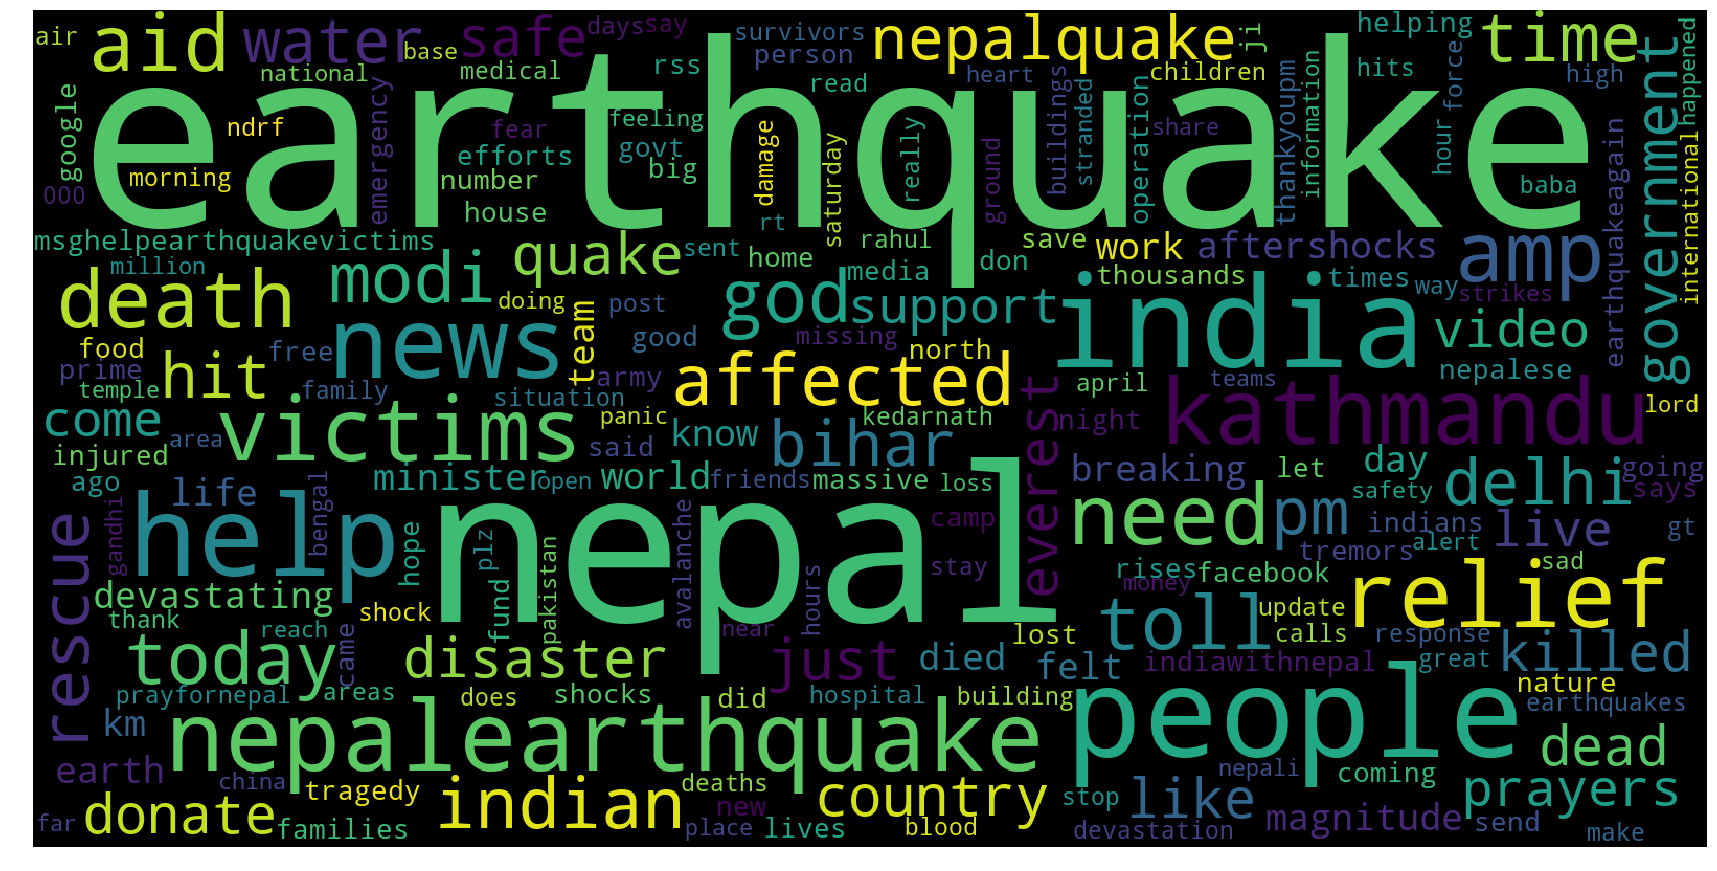

In [29]:
wordcloud=WordCloud(background_color='black',
                   width=1600,
                   height=800).generate_from_frequencies(irrelevant_result)
fig=plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
fig.savefig("irrelevant_wordcloud.png")
plt.show()

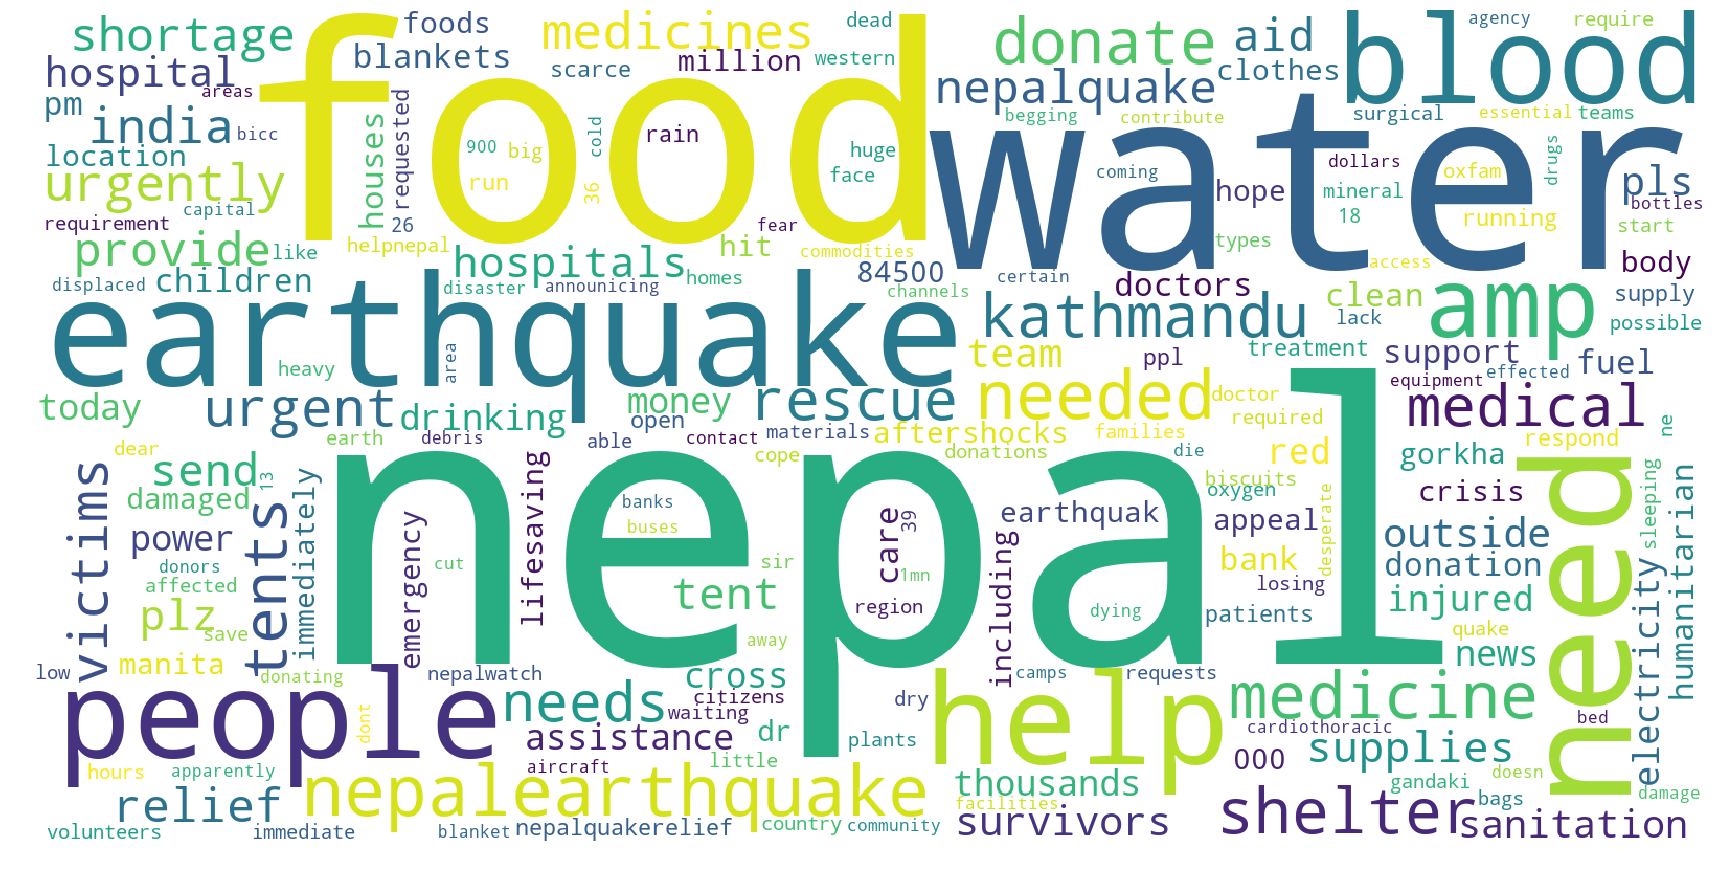

In [30]:
wordcloud=WordCloud(background_color='white',
                   width=1600,
                   height=800).generate_from_frequencies(need_result)
fig=plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
fig.savefig("need_wordcloud.png")
plt.show()

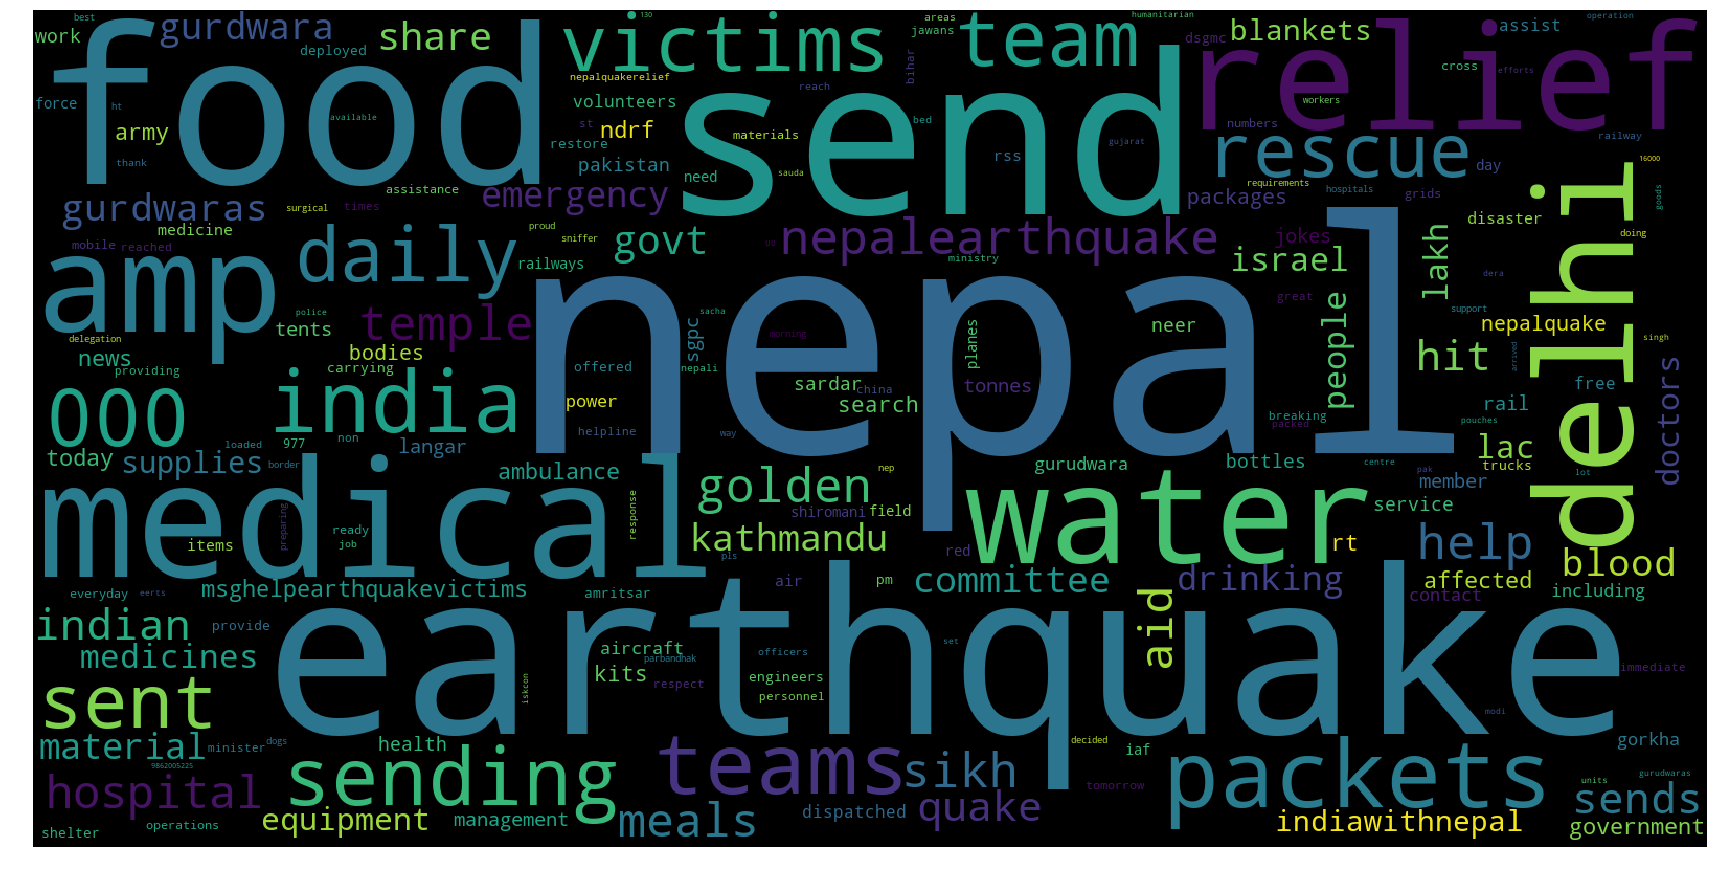

In [31]:
wordcloud=WordCloud(background_color='black',
                   width=1600,
                   height=800).generate_from_frequencies(available_result)
fig=plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
fig.savefig("available_wordcloud.png")
plt.show()

In [32]:
print(need_result)

{'000': 4, '13': 2, '18': 3, '1mn': 2, '24': 1, '26': 3, '36': 3, '39': 3, '3novices': 1, '500': 1, '84500': 4, '900': 2, '99': 1, '9u': 1, 'able': 3, 'acc': 1, 'access': 2, 'acute': 1, 'address': 1, 'affected': 3, 'aftershocks': 4, 'agency': 2, 'aid': 10, 'air': 1, 'aircraft': 2, 'airport': 1, 'alive': 1, 'ambulance': 1, 'ambulances': 1, 'amp': 26, 'ampeployment': 1, 'anaesthetists': 1, 'analgesic': 1, 'announce': 1, 'announced': 1, 'announicing': 2, 'antibiotics': 1, 'anybody': 1, 'apparently': 2, 'appeal': 4, 'area': 2, 'areas': 2, 'army': 1, 'arrange': 1, 'art': 1, 'asap': 1, 'ask': 1, 'asked': 1, 'assistance': 6, 'aswell': 1, 'attack': 1, 'avalanche': 1, 'away': 2, 'ayon': 1, 'bags': 3, 'bandages': 1, 'bank': 5, 'banks': 2, 'banneshwar': 1, 'basic': 1, 'bbc': 1, 'bed': 2, 'begging': 2, 'betadine': 1, 'better': 1, 'bhaktapur': 1, 'bible': 1, 'bicc': 2, 'big': 3, 'bir': 1, 'birth': 1, 'biscuits': 3, 'bl': 1, 'blanket': 2, 'blankets': 5, 'blood': 44, 'blooddonation': 1, 'bloods': 1, 

In [33]:
df_2=(df.groupby('TweetClass')['TweetText'].apply(lambda x: np.mean(x.str.len())).reset_index(name='mean_characters_per_tweet'))
print(df_2)

   TweetClass  mean_characters_per_tweet
0           0                  91.662231
1           1                  98.798995
2           2                 102.626506


In [34]:
df_3=(df.groupby('TweetClass')['TweetText'].apply(lambda x: np.sum(x.str.len())).reset_index(name='sum_characters_all_tweets'))
print(df_3)

   TweetClass  sum_characters_all_tweets
0           0                  1591348.0
1           1                    19661.0
2           2                    68144.0


In [35]:
#Splitting the dataset into train and test parts using STRATIFIED SHUFFLE SPLIT technique.
x=new_df['TweetText']
y=new_df['TweetClass']
from sklearn.model_selection import train_test_split
tts=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=6,stratify=y)
x_train,x_test,y_train,y_test=tts

In [36]:
#Using TfIdfVectoriser to vectorise the dataset.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_train=TfidfVectorizer(lowercase=True)
dtm_train=vectorizer_train.fit_transform(x_train.values.astype('U'))
dtm_test=vectorizer_train.transform(x_test.values.astype('U'))

# CLASSIFICATION OF DATA

### ----Training the model using the training set
### ----Testing the model on the test set
### ----Printing the following for each classification algorithm:
#### 1.Accuracy Score
#### 2.Confusion Matrix
#### 3.Classification Report

# 1.> Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
import datetime
regressor=LogisticRegression()
tick = datetime.datetime.now()
regressor.fit(dtm_train,y_train)
tock = datetime.datetime.now()
lr_train_time = tock - tick
print( lr_train_time)

0:00:00.284618


In [73]:
tick = datetime.datetime.now()
y_pred_lr=regressor.predict(dtm_test)
tock = datetime.datetime.now()
lr_pred_time = tock - tick
print( lr_pred_time)

0:00:00.001996


In [74]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [75]:
score1=accuracy_score(y_test,y_pred_lr)
print(score1)
#Observe accuracy 96.28%.

0.9628884826325411


In [76]:
print(confusion_matrix(y_test,y_pred_lr))

[[5193    1   17]
 [  54    4    2]
 [ 129    0   70]]


In [77]:
print(classification_report(y_test,y_pred_lr))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5211
          1       0.80      0.07      0.12        60
          2       0.79      0.35      0.49       199

avg / total       0.96      0.96      0.95      5470



# 2> KNN 

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
tick = datetime.datetime.now()
knn.fit(dtm_train,y_train)
tock = datetime.datetime.now()
knn_train_time = tock - tick
print( knn_train_time)

0:00:00.004987


In [79]:
tick = datetime.datetime.now()
y_pred_knn=knn.predict(dtm_test)
tock = datetime.datetime.now()
knn_pred_time = tock - tick
print( knn_pred_time)

0:00:05.112653


In [80]:
score2=accuracy_score(y_test,y_pred_knn)
print(score2)
#Observe accuracy 96.58%.

0.9667276051188299


In [81]:
print(confusion_matrix(y_test,y_pred_knn))

[[5154    2   55]
 [  42   16    2]
 [  77    4  118]]


In [82]:
print(classification_report(y_test,y_pred_knn))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      5211
          1       0.73      0.27      0.39        60
          2       0.67      0.59      0.63       199

avg / total       0.96      0.97      0.96      5470



# 3> Multinomial Naive Bayes 

In [83]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
tick = datetime.datetime.now()
model1.fit(dtm_train, y_train)
tock = datetime.datetime.now()
nb_train_time = tock - tick
print( nb_train_time)

0:00:00.006981


In [84]:
tick = datetime.datetime.now()
y_pred_nvm= model1.predict(dtm_test)
tock = datetime.datetime.now()
nb_pred_time = tock - tick
print( nb_pred_time)

0:00:00.001960


In [85]:
score3=accuracy_score(y_test , y_pred_nvm)
print(score3)
#Observe accuracy 95.33%.

0.953382084095064


In [86]:
print(confusion_matrix(y_test,y_pred_nvm))

[[5208    0    3]
 [  60    0    0]
 [ 192    0    7]]


In [87]:
print(classification_report(y_test,y_pred_nvm))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98      5211
          1       0.00      0.00      0.00        60
          2       0.70      0.04      0.07       199

avg / total       0.93      0.95      0.93      5470



C:\Users\Nishant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
